In [39]:
import pandas as pd
from fastai.tabular import *

In [40]:
# Temp fix
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""


Dataset filename .csv decoding

e.g. **Faults_Cleaning_Counters_100_D_20_1.csv**

Field | Description
------|-----------------
Faults_Cleaning_Counters | what is in the datset
100 |  number of machines Serial Numbers in the datset. 
D | time period of summarization D=Days W=Weeks
10 | depth of each row in periods
1 | time periods between two consecutive rows for the same Serial Number

In [41]:
dataset_root = "Faults_Cleaning_Counters_100_D_20_1"

In [42]:
df = pd.concat([pd.read_csv(dataset_root+"_0000.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0001.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0002.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0003.csv",parse_dates = ['Target Timestamp'])])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62300 entries, 0 to 15574
Columns: 605 entries, Unnamed: 0 to TARGET
dtypes: datetime64[ns](1), float64(601), int64(2), object(1)
memory usage: 288.0+ MB


In [44]:
categories_roots = list(set([s.split('-')[0] for s in df.columns if '-' in s]))
print(categories_roots)

['numsolubile', 'numcaffegr2', 'numcioccolato', 'FAULT', 'numcaffegr1', 'numcaffegr3', 'numcaffegenerale', 'numvaporeariats', 'numcaffegr4', 'tempogr3', 'CLEANING', 'nummac1gr1', 'portatagr2', 'nummac2gr1', 'tempogr1', 'numvapore', 'numacqua', 'numlattefr', 'portatagr4', 'tempogr4', 'numcicligr1', 'ngr2', 'numlattegr1', 'portatagr1', 'tempogr2', 'ngr1', 'ngr4', 'portatagr3', 'numvaporets', 'ngr3']


In [45]:
time_period=list(set([s.split('-')[1][-1] for s in df.columns if '-' in s]))[0]
time_period

'D'

In [46]:
target_width = 5

In [47]:
columns_to_sum = ['FAULT-%d%s'%(n,time_period) for n in range(target_width-1,0,-1)]
columns_to_sum.append('TARGET')
columns_to_sum

['FAULT-4D', 'FAULT-3D', 'FAULT-2D', 'FAULT-1D', 'TARGET']

In [48]:
from itertools import chain
columns_to_drop = [['%s-%d%s'%(root,n,time_period) for n in range(target_width-1,0,-1)] for root in categories_roots]
columns_to_drop = list(chain(*columns_to_drop))
print(columns_to_drop)

['numsolubile-4D', 'numsolubile-3D', 'numsolubile-2D', 'numsolubile-1D', 'numcaffegr2-4D', 'numcaffegr2-3D', 'numcaffegr2-2D', 'numcaffegr2-1D', 'numcioccolato-4D', 'numcioccolato-3D', 'numcioccolato-2D', 'numcioccolato-1D', 'FAULT-4D', 'FAULT-3D', 'FAULT-2D', 'FAULT-1D', 'numcaffegr1-4D', 'numcaffegr1-3D', 'numcaffegr1-2D', 'numcaffegr1-1D', 'numcaffegr3-4D', 'numcaffegr3-3D', 'numcaffegr3-2D', 'numcaffegr3-1D', 'numcaffegenerale-4D', 'numcaffegenerale-3D', 'numcaffegenerale-2D', 'numcaffegenerale-1D', 'numvaporeariats-4D', 'numvaporeariats-3D', 'numvaporeariats-2D', 'numvaporeariats-1D', 'numcaffegr4-4D', 'numcaffegr4-3D', 'numcaffegr4-2D', 'numcaffegr4-1D', 'tempogr3-4D', 'tempogr3-3D', 'tempogr3-2D', 'tempogr3-1D', 'CLEANING-4D', 'CLEANING-3D', 'CLEANING-2D', 'CLEANING-1D', 'nummac1gr1-4D', 'nummac1gr1-3D', 'nummac1gr1-2D', 'nummac1gr1-1D', 'portatagr2-4D', 'portatagr2-3D', 'portatagr2-2D', 'portatagr2-1D', 'nummac2gr1-4D', 'nummac2gr1-3D', 'nummac2gr1-2D', 'nummac2gr1-1D', 'tempog

In [52]:
df['TARGET']=df[columns_to_sum].sum(axis=1)

In [54]:

# For now only boolean prediction - using strings to avoid confusion
df.loc[df['TARGET']>0,'NEW_TARGET']='FAIL'
df.loc[df['TARGET']<=0,'NEW_TARGET']='OK'


In [55]:
df['NEW_TARGET'].value_counts()

OK      42371
FAIL    19929
Name: NEW_TARGET, dtype: int64

In [56]:
df.columns

Index(['Unnamed: 0', 'Serial', 'Model', 'Target Timestamp', 'CLEANING-20D',
       'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D', 'CLEANING-16D',
       'CLEANING-15D',
       ...
       'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D', 'tempogr4-5D',
       'tempogr4-4D', 'tempogr4-3D', 'tempogr4-2D', 'tempogr4-1D', 'TARGET',
       'NEW_TARGET'],
      dtype='object', length=606)

In [57]:
df['Target Timestamp'].min()
df['Target day'] = (df['Target Timestamp']-df['Target Timestamp'].min()).apply(lambda d: d.days)

In [58]:
columns_to_drop.extend(['Unnamed: 0','Target Timestamp','Serial','TARGET'])
df = df.drop(columns_to_drop,axis=1)

In [59]:
df.columns

Index(['Model', 'CLEANING-20D', 'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D',
       'CLEANING-16D', 'CLEANING-15D', 'CLEANING-14D', 'CLEANING-13D',
       'CLEANING-12D',
       ...
       'tempogr4-12D', 'tempogr4-11D', 'tempogr4-10D', 'tempogr4-9D',
       'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D', 'tempogr4-5D',
       'NEW_TARGET', 'Target day'],
      dtype='object', length=483)

In [60]:
cont_names = list(df.columns)
cont_names.remove('Model')
cont_names.remove('NEW_TARGET')


In [61]:
dep_var = 'NEW_TARGET'
cat_names = ['Model']
procs = [FillMissing, Categorify, Normalize]

In [62]:
train_test_ratio = .25

In [63]:
last_sample = len(df)
first_test = int(last_sample*(1 - train_test_ratio))
first_test,last_sample

(46725, 62300)

In [64]:
test = TabularList.from_df(df.iloc[first_test:last_sample].copy(), cat_names=cat_names,cont_names=cont_names)
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(first_test,last_sample)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [65]:
data.show_batch(rows=10)

Model,CLEANING-20D,CLEANING-19D,CLEANING-18D,CLEANING-17D,CLEANING-16D,CLEANING-15D,CLEANING-14D,CLEANING-13D,CLEANING-12D,CLEANING-11D,CLEANING-10D,CLEANING-9D,CLEANING-8D,CLEANING-7D,CLEANING-6D,CLEANING-5D,FAULT-20D,FAULT-19D,FAULT-18D,FAULT-17D,FAULT-16D,FAULT-15D,FAULT-14D,FAULT-13D,FAULT-12D,FAULT-11D,FAULT-10D,FAULT-9D,FAULT-8D,FAULT-7D,FAULT-6D,FAULT-5D,ngr1-20D,ngr1-19D,ngr1-18D,ngr1-17D,ngr1-16D,ngr1-15D,ngr1-14D,ngr1-13D,ngr1-12D,ngr1-11D,ngr1-10D,ngr1-9D,ngr1-8D,ngr1-7D,ngr1-6D,ngr1-5D,ngr2-20D,ngr2-19D,ngr2-18D,ngr2-17D,ngr2-16D,ngr2-15D,ngr2-14D,ngr2-13D,ngr2-12D,ngr2-11D,ngr2-10D,ngr2-9D,ngr2-8D,ngr2-7D,ngr2-6D,ngr2-5D,ngr3-20D,ngr3-19D,ngr3-18D,ngr3-17D,ngr3-16D,ngr3-15D,ngr3-14D,ngr3-13D,ngr3-12D,ngr3-11D,ngr3-10D,ngr3-9D,ngr3-8D,ngr3-7D,ngr3-6D,ngr3-5D,ngr4-20D,ngr4-19D,ngr4-18D,ngr4-17D,ngr4-16D,ngr4-15D,ngr4-14D,ngr4-13D,ngr4-12D,ngr4-11D,ngr4-10D,ngr4-9D,ngr4-8D,ngr4-7D,ngr4-6D,ngr4-5D,numacqua-20D,numacqua-19D,numacqua-18D,numacqua-17D,numacqua-16D,numacqua-15D,numacqua-14D,numacqua-13D,numacqua-12D,numacqua-11D,numacqua-10D,numacqua-9D,numacqua-8D,numacqua-7D,numacqua-6D,numacqua-5D,numcaffegenerale-20D,numcaffegenerale-19D,numcaffegenerale-18D,numcaffegenerale-17D,numcaffegenerale-16D,numcaffegenerale-15D,numcaffegenerale-14D,numcaffegenerale-13D,numcaffegenerale-12D,numcaffegenerale-11D,numcaffegenerale-10D,numcaffegenerale-9D,numcaffegenerale-8D,numcaffegenerale-7D,numcaffegenerale-6D,numcaffegenerale-5D,numcaffegr1-20D,numcaffegr1-19D,numcaffegr1-18D,numcaffegr1-17D,numcaffegr1-16D,numcaffegr1-15D,numcaffegr1-14D,numcaffegr1-13D,numcaffegr1-12D,numcaffegr1-11D,numcaffegr1-10D,numcaffegr1-9D,numcaffegr1-8D,numcaffegr1-7D,numcaffegr1-6D,numcaffegr1-5D,numcaffegr2-20D,numcaffegr2-19D,numcaffegr2-18D,numcaffegr2-17D,numcaffegr2-16D,numcaffegr2-15D,numcaffegr2-14D,numcaffegr2-13D,numcaffegr2-12D,numcaffegr2-11D,numcaffegr2-10D,numcaffegr2-9D,numcaffegr2-8D,numcaffegr2-7D,numcaffegr2-6D,numcaffegr2-5D,numcaffegr3-20D,numcaffegr3-19D,numcaffegr3-18D,numcaffegr3-17D,numcaffegr3-16D,numcaffegr3-15D,numcaffegr3-14D,numcaffegr3-13D,numcaffegr3-12D,numcaffegr3-11D,numcaffegr3-10D,numcaffegr3-9D,numcaffegr3-8D,numcaffegr3-7D,numcaffegr3-6D,numcaffegr3-5D,numcaffegr4-20D,numcaffegr4-19D,numcaffegr4-18D,numcaffegr4-17D,numcaffegr4-16D,numcaffegr4-15D,numcaffegr4-14D,numcaffegr4-13D,numcaffegr4-12D,numcaffegr4-11D,numcaffegr4-10D,numcaffegr4-9D,numcaffegr4-8D,numcaffegr4-7D,numcaffegr4-6D,numcaffegr4-5D,numcicligr1-20D,numcicligr1-19D,numcicligr1-18D,numcicligr1-17D,numcicligr1-16D,numcicligr1-15D,numcicligr1-14D,numcicligr1-13D,numcicligr1-12D,numcicligr1-11D,numcicligr1-10D,numcicligr1-9D,numcicligr1-8D,numcicligr1-7D,numcicligr1-6D,numcicligr1-5D,numcioccolato-20D,numcioccolato-19D,numcioccolato-18D,numcioccolato-17D,numcioccolato-16D,numcioccolato-15D,numcioccolato-14D,numcioccolato-13D,numcioccolato-12D,numcioccolato-11D,numcioccolato-10D,numcioccolato-9D,numcioccolato-8D,numcioccolato-7D,numcioccolato-6D,numcioccolato-5D,numlattefr-20D,numlattefr-19D,numlattefr-18D,numlattefr-17D,numlattefr-16D,numlattefr-15D,numlattefr-14D,numlattefr-13D,numlattefr-12D,numlattefr-11D,numlattefr-10D,numlattefr-9D,numlattefr-8D,numlattefr-7D,numlattefr-6D,numlattefr-5D,numlattegr1-20D,numlattegr1-19D,numlattegr1-18D,numlattegr1-17D,numlattegr1-16D,numlattegr1-15D,numlattegr1-14D,numlattegr1-13D,numlattegr1-12D,numlattegr1-11D,numlattegr1-10D,numlattegr1-9D,numlattegr1-8D,numlattegr1-7D,numlattegr1-6D,numlattegr1-5D,nummac1gr1-20D,nummac1gr1-19D,nummac1gr1-18D,nummac1gr1-17D,nummac1gr1-16D,nummac1gr1-15D,nummac1gr1-14D,nummac1gr1-13D,nummac1gr1-12D,nummac1gr1-11D,nummac1gr1-10D,nummac1gr1-9D,nummac1gr1-8D,nummac1gr1-7D,nummac1gr1-6D,nummac1gr1-5D,nummac2gr1-20D,nummac2gr1-19D,nummac2gr1-18D,nummac2gr1-17D,nummac2gr1-16D,nummac2gr1-15D,nummac2gr1-14D,nummac2gr1-13D,nummac2gr1-12D,nummac2gr1-11D,nummac2gr1-10D,nummac2gr1-9D,nummac2gr1-8D,nummac2gr1-7D,nummac2gr1-6D,nummac2gr1-5D,numsolubile-20D,numsolubile-19D,numsolubile-18D,nums

In [96]:
torch.manual_seed(7)



In [97]:
learn = tabular_learner(data, layers=[1000,500,500,200], metrics=accuracy,wd=0.01)

In [98]:
#learn.fit(1, 1e-2)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.254263,0.889168,0.602440


In [99]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


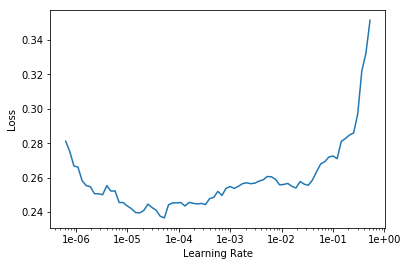

In [100]:
learn.recorder.plot()


In [101]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,accuracy
1,0.266155,1.316987,0.590562


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


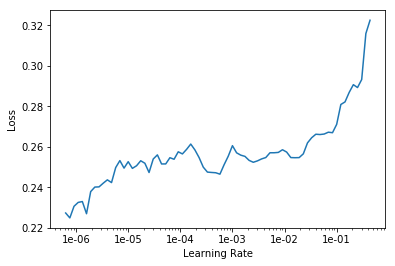

In [102]:
learn.lr_find()
learn.recorder.plot()


In [103]:
learn.fit_one_cycle(1, 4e-3)

epoch,train_loss,valid_loss,accuracy
1,0.262543,3.124651,0.599294


In [104]:
from fastai.vision import *
interp = ClassificationInterpretation.from_learner(learn)

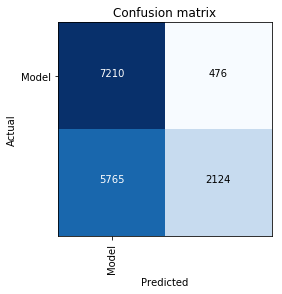

In [105]:
interp.plot_confusion_matrix()

### Utility - split the datset

In [ ]:
#
# Split the dataset in smaller chunks to allow upload to gisthub
#
#df = pd.read_csv("Faults_Cleaning_Counters_100_D_20_1.csv",parse_dates = ['Target Timestamp'])
#n = 4
#split = len(df)/n
#name = "Faults_Cleaning_Counters_100_D_20_1.csv"
#
#for i,start_idx in enumerate(range(0,l,int(len(df)/n))):
#    stop_idx = min(start_idx+int(len(df)/n),len(df))
#    print(start_idx,stop_idx)
#    file = "%s_%04d.csv"%(name.split('.')[0],i)
#    print(file)
#    df.iloc[start_idx:stop_idx].to_csv(file)